In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, t
import numpy as np


In [3]:
tomasetti = pd.read_csv("https://stats191.stanford.edu/data/Tomasetti.csv")


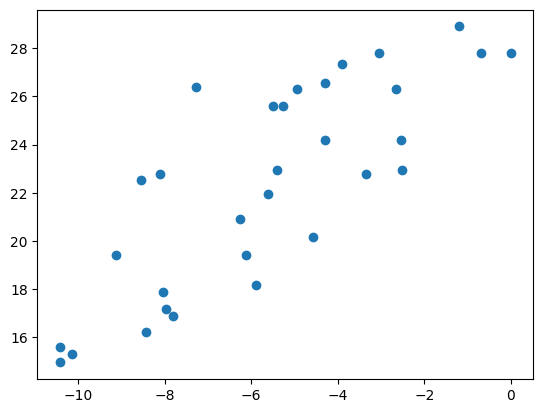

In [23]:
plt.scatter(np.log(tomasetti['Risk']), np.log(tomasetti['Lscd']))
plt.show()

In [30]:
X = np.log(tomasetti['Risk'])
Y = np.log(tomasetti['Lscd'])

In [31]:
reg = linregress(X, Y)

In [37]:
Y_pred = reg.intercept + reg.slope*X
error = Y - Y_pred

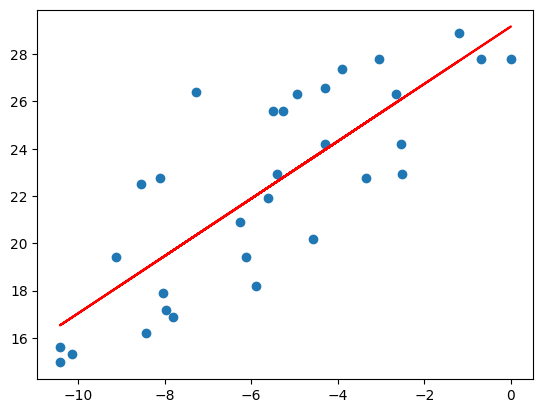

In [36]:
plt.plot(X, Y_pred, 'r', label='fitted line')
plt.scatter(X, Y)
plt.show()

Intreval for $ x_{0} $ is:  
 
 $ \hat{y} \pm t_{n-2, 1- {\alpha \over 2}}\hat{\sigma}\sqrt{1 + {1 \over n} + {(\bar{X} - x_{0})^{2} \over nV[X]}} $  
 here $ \hat{\sigma} $ is with 2 dof, the sample std of the error

In [58]:
alpha = 0.05
n = X.size
e_std = error.std(ddof=2)
X_mean = X.mean()
X_var = X.var(ddof=0)
t_crit = t.ppf(1 - alpha/2, n - 2)
lengths = t_crit*e_std*np.sqrt(1 + 1/n + (X_mean - X) ** 2 /(n * X_var))


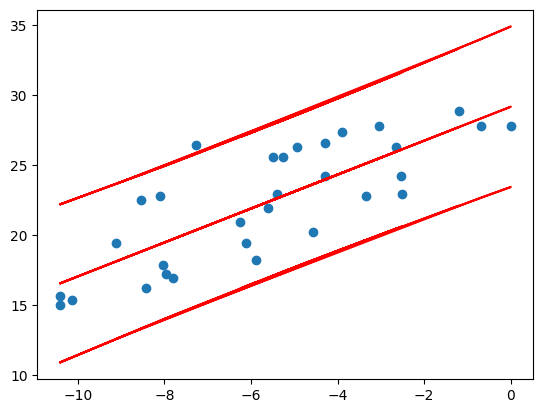

In [60]:
plt.plot(X, Y_pred, 'r', label='fitted line')
plt.plot(X, Y_pred + lengths, 'r', label='upper bound')
plt.plot(X, Y_pred - lengths, 'r', label='lower bound')


plt.scatter(X, Y)
plt.show()

using:  
$ {{\hat{b_{1}} - b_{1}} \over \hat{\sigma}\sqrt{(X^{T}X)^{-1}_{1,1}}} \sim t_{n-2} $ 
then:   
$ H_{0}: b_{1} = 0 $  
$ H_{1}: b_{1} \ne 0 $  
define:  
$ T_{n} =  {{\hat{b_{1}}} \over \hat{\sigma}\sqrt{(X^{T}X)^{-1}_{1,1}}} $  
then we test by:  
$ \varphi_{\alpha}(T_{n, m}) = 1\{|T_{n}|\ > q_{1-{\alpha \over 2}}\} $  
Further more, $ p\_ val(T_{n, m}) = 2P(t_{n-2} > |T_{n}|) $

In [77]:
alpha = 0.05
n = X.size
mat_X = np.array([np.ones(n), np.array(X)]).T
r = np.linalg.inv((mat_X.T @ mat_X))[1,1]
e_std = error.std(ddof=2)
T = reg.slope / (e_std * np.sqrt(r))
p_val = 2 * (1- t.cdf(np.abs(T), n - 2))
print('p_val=', p_val)


p_val= 5.117111978591993e-08


so we reject $H_{0} $

In [79]:
alpha = 0.05
n = X.size
mat_X = np.array([np.ones(n), np.array(X)]).T
r = np.linalg.inv((mat_X.T @ mat_X))[1,1]
e_std = error.std(ddof=2)
t_crit = t.ppf(1 - alpha/2, n - 2)
length = t_crit * (e_std * np.sqrt(r))
print("CI for b1 ", (reg.slope - length, reg.slope+length ))


CI for b1  (0.8726123482392006, 1.5544774420293423)


In [89]:
R_sq = reg.rvalue**2
print("R^2: ", R_sq)

R^2:  0.6463325457077906


In [99]:
ad_R_sq = 1 - (1-R_sq) * (n-1) / (n-2)
print("ad_R^2: ", ad_R_sq)

ad_R^2:  0.6341371162494386


In [97]:
error_var = error.var(ddof=0)
print("error var: ", error_var)

error var:  6.341323977937531


In [96]:
(Y - Y_pred).std(ddof=1)

2.559824494739587

no, it just says the 67% of the varaity in the risk can be explained by the model